In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [ ]:
# We can see all columns in df.head() / and .tail()
pd.set_option('display.max_columns', None)

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1-0ZlBvFFtZ76KxePLBMInWyU-bZIKKVy' #<-- You add in here the id from you google drive file, you can find it
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
df  = pd.read_csv("file.csv")

In [ ]:
df.head()

,Unnamed: 0,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Not Specified,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.119403,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.119403,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.119403,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,3,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.119403,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,4,0.214286,0.069997,0.102087,0.363636,0.363636,0.060606,0.444444,0.119403,0.2,0.465276,0.235294,1,0.16202,0.140104,0.666667,0,0.027865,0.002479,1.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
# Don't need "Unnamed: 0"
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.shape

(100000, 50)

In [ ]:
X = df.drop(["Credit_Score"],axis=1)
y = df["Credit_Score"]

### Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model

In [ ]:
baseline = LogisticRegression(random_state=0).fit(X, y)

In [ ]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(baseline.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(baseline.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on training set: 0.66
Accuracy of Logistic Regression classifier on test set: 0.66


In [ ]:
y_pred_baseline = baseline.predict(X_test)
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.68      0.53      0.60      5874
           1       0.58      0.58      0.58      3527
           2       0.67      0.75      0.71     10599

    accuracy                           0.66     20000
   macro avg       0.64      0.62      0.63     20000
weighted avg       0.66      0.66      0.65     20000



# Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [ ]:
rfe_mod = RFECV(RandomForestClassifier(), cv=3, scoring='f1_macro')
rfe_mod.fit(X_train, y_train)       

RFECV(cv=3, estimator=RandomForestClassifier(), scoring='f1_macro')

In [ ]:
print("Feature ranking: ", rfe_mod.ranking_)

Feature ranking:  [ 9  1  1 12  1  1 14  1  2  1  5  1  1  1  1 11  7  4 39 16 22 19 21 17
 23 18 20 40 35 31 27 33 25 26 32 28 36 30 34 37 24 29 38 10  6 13 15  8
  3]


Optimal number of features : 10


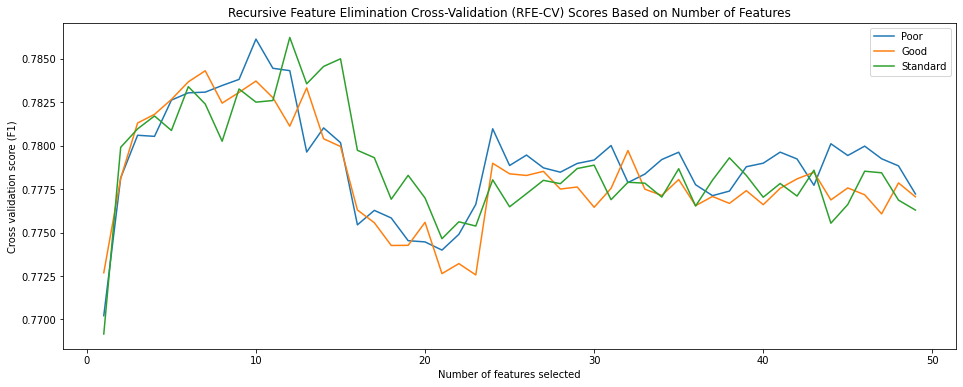

In [ ]:
print("Optimal number of features : %d" % rfe_mod.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure( figsize=(16, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (F1)")
plt.plot(
    range(1, len(rfe_mod.grid_scores_) + 1),
    rfe_mod.grid_scores_,
)
plt.title('Recursive Feature Elimination Cross-Validation (RFE-CV) Scores Based on Number of Features')
plt.legend(['Poor','Good','Standard'])
plt.show()

In [ ]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfe_mod.support_[i], 'ranking': rfe_mod.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(10)

,feature,support,ranking
1,1,True,1
2,2,True,1
14,14,True,1
4,4,True,1
5,5,True,1
13,13,True,1
7,7,True,1
12,12,True,1
9,9,True,1
11,11,True,1


In [ ]:
df_features[df_features['support']==True]

,feature,support,ranking
1,1,True,1
2,2,True,1
4,4,True,1
5,5,True,1
7,7,True,1
9,9,True,1
11,11,True,1
12,12,True,1
13,13,True,1
14,14,True,1


In [ ]:
X_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Not Specified,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
75220,0.142857,0.545684,0.552466,0.181818,0.272727,0.030303,0.222222,0.283582,0.266667,0.256645,0.235294,1,0.212258,0.302419,0.737374,0,0.074574,0.010094,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48955,0.261905,0.612070,0.629572,0.545455,0.090909,0.272727,0.444444,0.283582,0.400000,0.321520,0.000000,1,0.144596,0.154578,0.866162,0,0.198761,0.016645,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
44966,0.833333,0.121953,0.125483,0.545455,0.636364,0.212121,0.333333,0.507463,0.333333,0.196056,0.235294,2,0.090927,0.199197,0.792929,0,0.150788,0.009192,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
13568,0.476190,0.089214,0.104235,0.727273,0.636364,0.242424,0.444444,0.313433,0.500000,0.464418,0.176471,2,0.033482,0.391681,0.871212,0,0.032846,0.004604,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
92727,0.309524,0.080757,0.110080,0.272727,0.272727,0.242424,0.111111,0.074627,0.433333,0.427265,0.058824,1,0.146297,0.337863,0.714646,0,0.009104,0.006691,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
selected_features = rfe_mod.get_support(1)
X_RFE = X_train[X_train.columns[selected_features]]

In [ ]:
X_RFE_test = X_test[X_test.columns[selected_features]]

In [ ]:
X_RFE.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
75220,0.545684,0.552466,0.272727,0.030303,0.283582,0.256645,1,0.212258,0.302419,0.737374
48955,0.612070,0.629572,0.090909,0.272727,0.283582,0.321520,1,0.144596,0.154578,0.866162
44966,0.121953,0.125483,0.636364,0.212121,0.507463,0.196056,2,0.090927,0.199197,0.792929
13568,0.089214,0.104235,0.636364,0.242424,0.313433,0.464418,2,0.033482,0.391681,0.871212
92727,0.080757,0.110080,0.272727,0.242424,0.074627,0.427265,1,0.146297,0.337863,0.714646


In [ ]:
X_RFE.shape

(80000, 10)

# Sampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

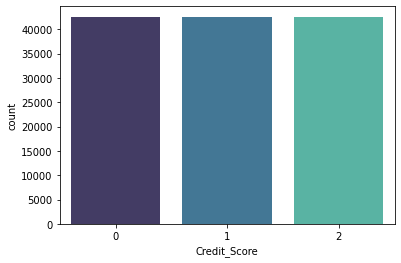

In [ ]:
sns.countplot(y_res, palette = 'mako');

In [ ]:
# Target distribution before SMOTE
# Standard    53174
# Poor        28998
# Good        17828

In [ ]:
y_res.value_counts()

2    42575
1    42575
0    42575
Name: Credit_Score, dtype: int64

In [ ]:
# RFECV w/ SMOTE
sm2 = SMOTE(random_state=42)
X_res_rfe, y_res_rfe = sm2.fit_resample(X_RFE, y_train)

# Metrics

In [ ]:
# METRICS REQUIRED

# Area Under Curve (AUC)
# Receiver Operating Characteristic  (ROC)
# Training Time
# Accuracy
# F1 - Score
# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("Training Data Results: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    clf_report = clf_report.round(4)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print()
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print()
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print()
    print()
    print()
    print("Test Data Results: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    clf_report = clf_report.round(4)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print()
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print()
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
def evaluate_test(model, X_test, y_test):
    y_test_pred = model.predict(X_test)
    auc_score= roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    print("========================================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    clf_report = clf_report.round(4)
    print('Area Under Curve (AUC): {:0.2f}'.format(auc_score))
    print()
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# Models

## Baseline Log Reg

In [ ]:
evaluate(baseline, X_train, X_test, y_train, y_test)

Training Data Results: 
CONFUSION MATRIX:
[[12124  1245  9755]
 [  181  8291  5829]
 [ 5765  4786 32024]]

ACCURACY SCORE:
0.6555

CLASSIFICATION REPORT:
                      0             1             2  accuracy     macro avg  \
precision      0.670946      0.578900      0.672660  0.655488      0.640835   
recall         0.524304      0.579750      0.752179  0.655488      0.618744   
f1-score       0.588629      0.579324      0.710200  0.655488      0.626051   
support    23124.000000  14301.000000  42575.000000  0.655488  80000.000000   

           weighted avg  
precision      0.655404  
recall         0.655488  
f1-score       0.651665  
support    80000.000000  



Test Data Results: 
CONFUSION MATRIX:
[[3129  293 2452]
 [  52 2031 1444]
 [1448 1167 7984]]

ACCURACY SCORE:
0.6572

CLASSIFICATION REPORT:
                     0            1             2  accuracy     macro avg  \
precision     0.675956     0.581782      0.672054    0.6572      0.643264   
recall        0.532686

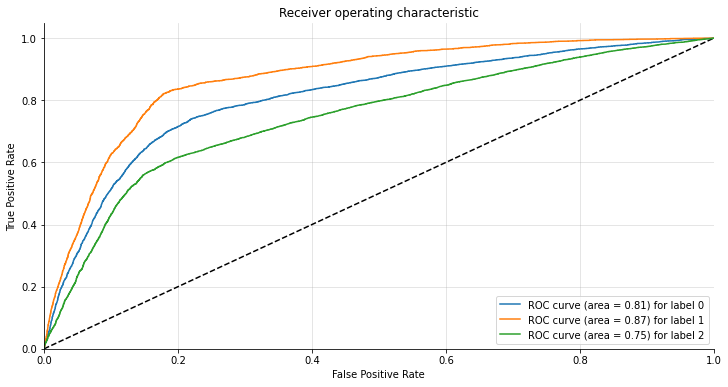

In [ ]:
plot_multiclass_roc(baseline, X_test, y_test, n_classes=3, figsize=(12, 6))

### Log Reg w/ SMOTE

In [ ]:
# X_res, y_res
baseline_smote = LogisticRegression(random_state=0).fit(X_res, y_res)

In [ ]:
# Compare baseline vs basline w/ smote
print("==== Basic Log Reg on Test data =====")
evaluate_test(baseline, X_test, y_test)
print()
print()
print("=== Log Reg with SMOTE on Test data ===")
evaluate_test(baseline_smote, X_test, y_test)

==== Basic Log Reg on Test data =====
Area Under Curve (AUC): 0.81

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.6760     0.5818      0.6721    0.6572      0.6433   
recall        0.5327     0.5758      0.7533    0.6572      0.6206   
f1-score      0.5958     0.5788      0.7104    0.6572      0.6283   
support    5874.0000  3527.0000  10599.0000    0.6572  20000.0000   

           weighted avg  
precision        0.6573  
recall           0.6572  
f1-score         0.6535  
support      20000.0000  


=== Log Reg with SMOTE on Test data ===
Area Under Curve (AUC): 0.80

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.6358     0.4969      0.7748    0.6539      0.6358   
recall        0.6398     0.8092      0.6101    0.6539      0.6863   
f1-score      0.6378     0.6157      0.6826    0.6539      0.6454   
support    5874.0000  3527.0000  10599.0000    0.6539  20000.0

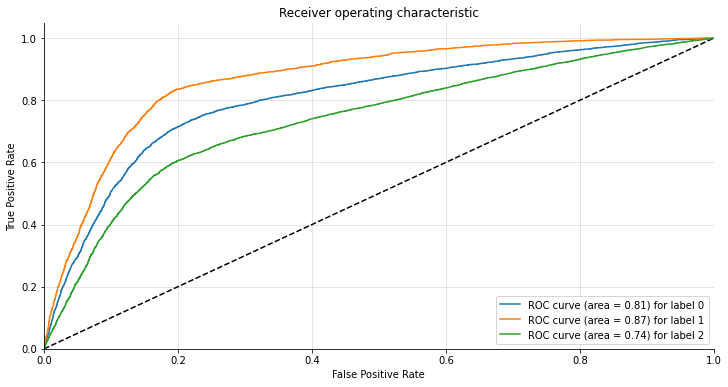

In [ ]:
plot_multiclass_roc(baseline_smote, X_test, y_test, n_classes=3, figsize=(12, 6))

### Log Reg w/ RFECV + SMOTE

In [ ]:
baseline_clf_smote_rfecv =  LogisticRegression(random_state=0)
baseline_clf_smote_rfecv.fit(X_res_rfe, y_res)

LogisticRegression(random_state=0)

In [ ]:
# compare baseline log-reg vs log-reg w/ smote + RFECV
print("==== Basic KNN on Test data =====")
evaluate_test(baseline, X_test, y_test)
print()
print()
print("=== Log Reg with SMOTE + RFECV on Test data ===")
evaluate_test(baseline_clf_smote_rfecv, X_RFE_test, y_test)

==== Basic KNN on Test data =====
Area Under Curve (AUC): 0.81

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.6760     0.5818      0.6721    0.6572      0.6433   
recall        0.5327     0.5758      0.7533    0.6572      0.6206   
f1-score      0.5958     0.5788      0.7104    0.6572      0.6283   
support    5874.0000  3527.0000  10599.0000    0.6572  20000.0000   

           weighted avg  
precision        0.6573  
recall           0.6572  
f1-score         0.6535  
support      20000.0000  


=== Log Reg with SMOTE + RFECV on Test data ===
Area Under Curve (AUC): 0.80

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.6193     0.4924      0.7801    0.6467      0.6306   
recall        0.6527     0.8117      0.5885    0.6467      0.6843   
f1-score      0.6356     0.6130      0.6709    0.6467      0.6398   
support    5874.0000  3527.0000  10599.0000    0.6467  200

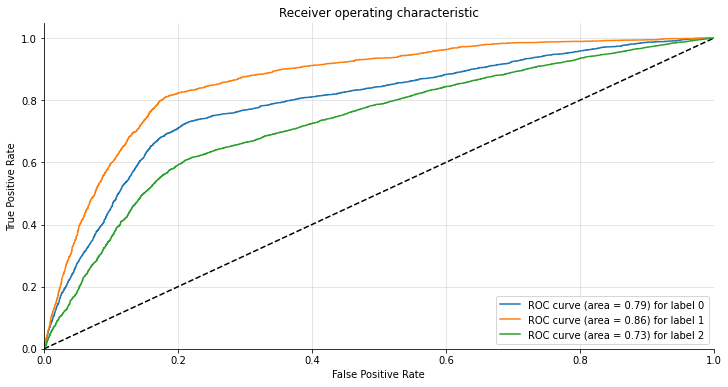

In [ ]:
plot_multiclass_roc(baseline_clf_smote_rfecv, X_RFE_test, y_test, n_classes=3, figsize=(12, 6))

## KNN

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
evaluate(knn_clf, X_train, X_test, y_train, y_test)

Training Data Results: 
CONFUSION MATRIX:
[[18171   822  4131]
 [  992 10237  3072]
 [ 4977  3097 34501]]

ACCURACY SCORE:
0.7864

CLASSIFICATION REPORT:
                      0             1             2  accuracy     macro avg  \
precision      0.752734      0.723156      0.827283  0.786362      0.767724   
recall         0.785807      0.715824      0.810358  0.786362      0.770663   
f1-score       0.768915      0.719471      0.818733  0.786362      0.769040   
support    23124.000000  14301.000000  42575.000000  0.786362  80000.000000   

           weighted avg  
precision      0.787121  
recall         0.786362  
f1-score       0.786589  
support    80000.000000  


Test data Results: 
CONFUSION MATRIX:
[[3909  319 1646]
 [ 355 2048 1124]
 [1774 1063 7762]]

ACCURACY SCORE:
0.6859

CLASSIFICATION REPORT:
                     0            1             2  accuracy     macro avg  \
precision     0.647400     0.597085      0.736992   0.68595      0.660492   
recall        0.665475 

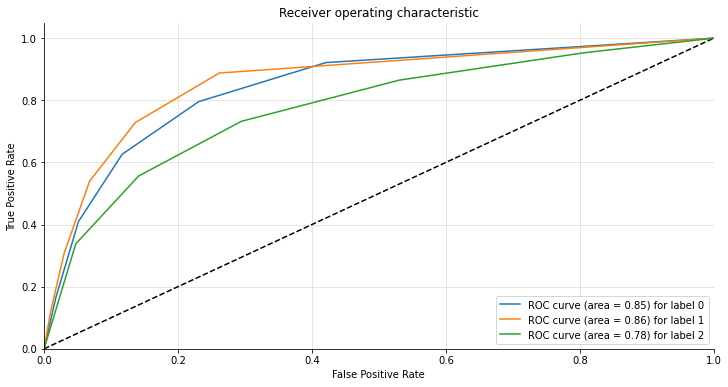

In [ ]:
plot_multiclass_roc(knn_clf, X_test, y_test, n_classes=3, figsize=(12, 6))

### KNN w/ SMOTE

In [ ]:
# X_res, y_res
knn_clf_smote = KNeighborsClassifier()
knn_clf_smote.fit(X_res, y_res)

KNeighborsClassifier()

In [ ]:
# compare basic knn vs knn w/ smote
print("==== Basic KNN on Test data =====")
evaluate_test(knn_clf, X_test, y_test)
print()
print()
print("=== KNN with SMOTE on Test data ===")
evaluate_test(knn_clf_smote, X_test, y_test)

==== Basic KNN on Test data =====
Area Under Curve (AUC): 0.83

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.6474     0.5971      0.7370    0.6859      0.6605   
recall        0.6655     0.5807      0.7323    0.6859      0.6595   
f1-score      0.6563     0.5888      0.7347    0.6859      0.6599   
support    5874.0000  3527.0000  10599.0000    0.6859  20000.0000   

           weighted avg  
precision        0.6860  
recall           0.6859  
f1-score         0.6859  
support      20000.0000  


=== KNN with SMOTE on Test data ===
Area Under Curve (AUC): 0.85

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.6469     0.5468      0.8216    0.6892      0.6718   
recall        0.7896     0.7879      0.6006    0.6892      0.7260   
f1-score      0.7111     0.6456      0.6940    0.6892      0.6836   
support    5874.0000  3527.0000  10599.0000    0.6892  20000.0000   



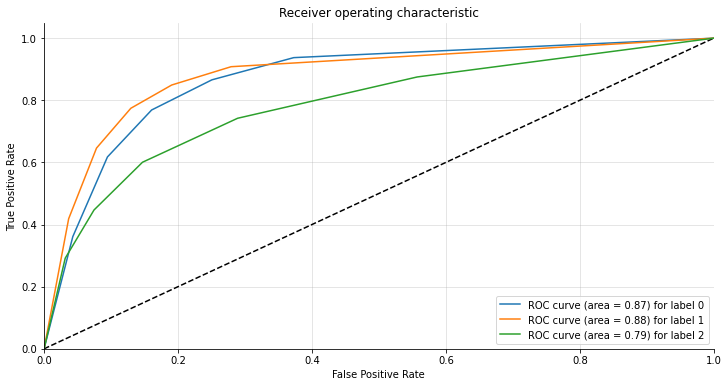

In [ ]:
plot_multiclass_roc(knn_clf_smote, X_test, y_test, n_classes=3, figsize=(12, 6))

### KNN w/ RFECV + SMOTE (feature selection)

In [ ]:
# I don't want to re-run RFECV because it takes around 2 hours.... :(
# X_res_rfe
# X_RFE_test
knn_clf_smote_rfecv = KNeighborsClassifier()
knn_clf_smote_rfecv.fit(X_res_rfe, y_res)

KNeighborsClassifier()

In [ ]:
# compare basic knn vs knn w/ smote + RFECV
print("==== Basic KNN on Test data =====")
evaluate_test(knn_clf, X_test, y_test)
print()
print()
print("=== KNN with SMOTE + RFECV on Test data ===")
evaluate_test(knn_clf_smote_rfecv, X_RFE_test, y_test)

==== Basic KNN on Test data =====
Area Under Curve (AUC): 0.83

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.6474     0.5971      0.7370    0.6859      0.6605   
recall        0.6655     0.5807      0.7323    0.6859      0.6595   
f1-score      0.6563     0.5888      0.7347    0.6859      0.6599   
support    5874.0000  3527.0000  10599.0000    0.6859  20000.0000   

           weighted avg  
precision        0.6860  
recall           0.6859  
f1-score         0.6859  
support      20000.0000  


=== KNN with SMOTE + RFECV on Test data ===
Area Under Curve (AUC): 0.92

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7790     0.7305      0.8443     0.801      0.7846   
recall        0.8570     0.8106      0.7667     0.801      0.8114   
f1-score      0.8161     0.7684      0.8036     0.801      0.7961   
support    5874.0000  3527.0000  10599.0000     0.801  20000.0

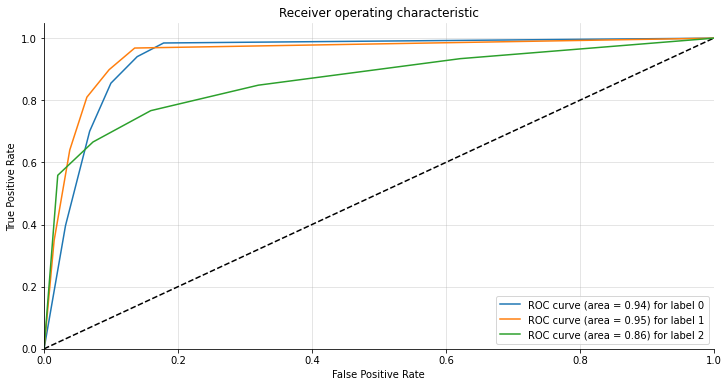

In [ ]:
plot_multiclass_roc(knn_clf_smote_rfecv, X_RFE_test, y_test, n_classes=3, figsize=(12, 6))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
evaluate(rnd_clf, X_train, X_test, y_train, y_test)

Training Data Results: 
CONFUSION MATRIX:
[[21722     4  1398]
 [    5 13114  1182]
 [ 2573  1560 38442]]

ACCURACY SCORE:
0.9160

CLASSIFICATION REPORT:
                      0             1             2  accuracy     macro avg  \
precision      0.893909      0.893446      0.937107  0.915975      0.908154   
recall         0.939370      0.916999      0.902924  0.915975      0.919764   
f1-score       0.916076      0.905069      0.919698  0.915975      0.913615   
support    23124.000000  14301.000000  42575.000000  0.915975  80000.000000   

           weighted avg  
precision      0.916816  
recall         0.915975  
f1-score       0.916036  
support    80000.000000  


Test data Results: 
CONFUSION MATRIX:
[[4816    1 1057]
 [   5 2642  880]
 [1311  884 8404]]

ACCURACY SCORE:
0.7931

CLASSIFICATION REPORT:
                     0            1             2  accuracy     macro avg  \
precision     0.785388     0.749079      0.812687    0.7931      0.782385   
recall        0.819884 

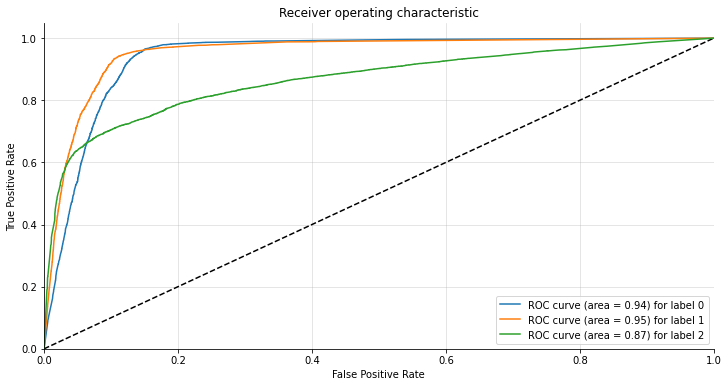

In [ ]:
plot_multiclass_roc(rnd_clf, X_test, y_test, n_classes=3, figsize=(12, 6))

### Random Forest w/ SMOTE

In [ ]:
# X_res, y_res
rnd_clf_smote = RandomForestClassifier(random_state=42)
rnd_clf_smote.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [ ]:
# Compare basic random forest vs random forest w/ smote
print("==== Basic RF on Test data =====")
evaluate_test(rnd_clf, X_test, y_test)
print()
print()
print("=== RF with SMOTE on Test data ===")
evaluate_test(rnd_clf_smote, X_test, y_test)

==== Basic RF on Test data =====
Area Under Curve (AUC): 0.92

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7854     0.7491      0.8127    0.7931      0.7824   
recall        0.8199     0.7491      0.7929    0.7931      0.7873   
f1-score      0.8023     0.7491      0.8027    0.7931      0.7847   
support    5874.0000  3527.0000  10599.0000    0.7931  20000.0000   

           weighted avg  
precision        0.7935  
recall           0.7931  
f1-score         0.7931  
support      20000.0000  


=== RF with SMOTE on Test data ===
Area Under Curve (AUC): 0.92

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7765     0.7332      0.8244    0.7922      0.7780   
recall        0.8371     0.7743      0.7734    0.7922      0.7949   
f1-score      0.8057     0.7532      0.7981    0.7922      0.7856   
support    5874.0000  3527.0000  10599.0000    0.7922  20000.0000   

  

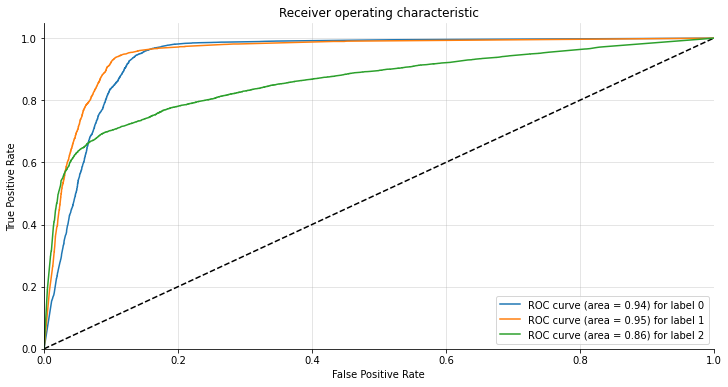

In [ ]:
plot_multiclass_roc(rnd_clf_smote, X_test, y_test, n_classes=3, figsize=(12, 6))

### Random Forest w/ RFECV + SMOTE

In [ ]:
rnd_clf_smote_rfecv = RandomForestClassifier(random_state=42)
rnd_clf_smote_rfecv.fit(X_res_rfe, y_res)

RandomForestClassifier(random_state=42)

In [ ]:
# compare basic random forest vs random forest w/ smote + RFECV
print("==== Basic Random Forest on Test data =====")
evaluate_test(rnd_clf, X_test, y_test)
print()
print()
print("=== Random Forest with SMOTE + RFECV on Test data ===")
evaluate_test(rnd_clf_smote_rfecv, X_RFE_test, y_test)

==== Basic Random Forest on Test data =====
Area Under Curve (AUC): 0.92

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7854     0.7491      0.8127    0.7931      0.7824   
recall        0.8199     0.7491      0.7929    0.7931      0.7873   
f1-score      0.8023     0.7491      0.8027    0.7931      0.7847   
support    5874.0000  3527.0000  10599.0000    0.7931  20000.0000   

           weighted avg  
precision        0.7935  
recall           0.7931  
f1-score         0.7931  
support      20000.0000  


=== Random Forest with SMOTE + RFECV on Test data ===
Area Under Curve (AUC): 0.92

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7783     0.7207      0.8602    0.8045      0.7864   
recall        0.8730     0.8412      0.7543    0.8045      0.8228   
f1-score      0.8229     0.7763      0.8038    0.8045      0.8010   
support    5874.0000  3527.0000  10599.000

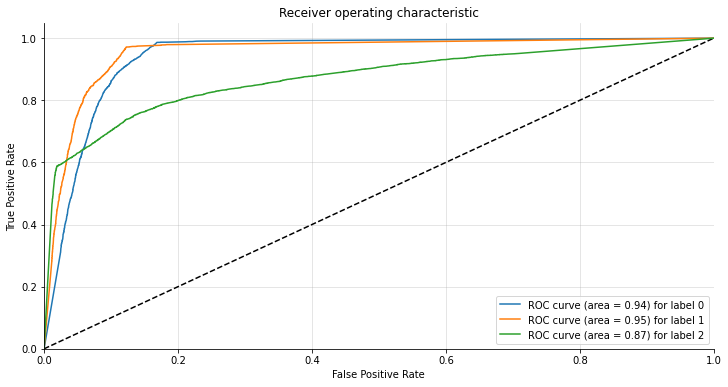

In [ ]:
plot_multiclass_roc(rnd_clf_smote_rfecv, X_RFE_test, y_test, n_classes=3, figsize=(12, 6))

## XGBoost

In [ ]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob', random_state=42)

In [ ]:
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

Training Data Results: 
CONFUSION MATRIX:
[[15058  1652  6414]
 [  195 10222  3884]
 [ 4672  5652 32251]]

ACCURACY SCORE:
0.7191

CLASSIFICATION REPORT:
                      0             1             2  accuracy     macro avg  \
precision      0.755734      0.583248      0.757973  0.719137      0.698985   
recall         0.651185      0.714775      0.757510  0.719137      0.707823   
f1-score       0.699575      0.642348      0.757742  0.719137      0.699888   
support    23124.000000  14301.000000  42575.000000  0.719137  80000.000000   

           weighted avg  
precision      0.726092  
recall         0.719137  
f1-score       0.720300  
support    80000.000000  


Test data Results: 
CONFUSION MATRIX:
[[3798  411 1665]
 [  49 2490  988]
 [1192 1411 7996]]

ACCURACY SCORE:
0.7142

CLASSIFICATION REPORT:
                     0            1             2  accuracy     macro avg  \
precision     0.753721     0.577458      0.750869    0.7142      0.694016   
recall        0.646578 

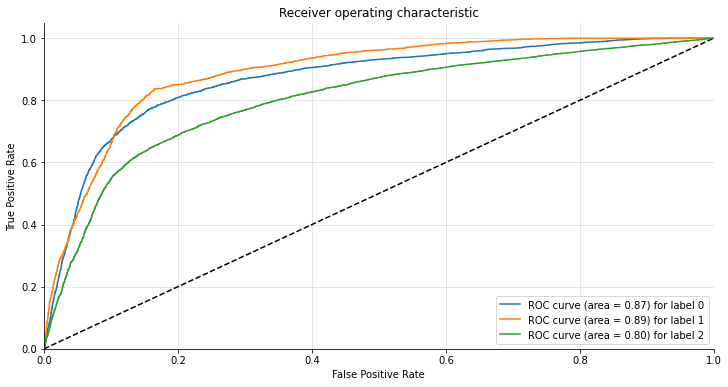

In [ ]:
plot_multiclass_roc(xgb_clf, X_test, y_test, n_classes=3, figsize=(12, 6))

### XGboost w/ SMOTE

In [ ]:
# X_res, y_res
xgb_clf_smote = XGBClassifier(random_state=42)
xgb_clf_smote.fit(X_res, y_res)

XGBClassifier(objective='multi:softprob', random_state=42)

In [ ]:
# Compare basic xgboost vs xgboost w/ smote
print("==== Basic XGboost on Test data =====")
evaluate_test(xgb_clf, X_test, y_test)
print()
print()
print("=== XGboost with SMOTE on Test data ===")
evaluate_test(xgb_clf_smote, X_test, y_test)

==== Basic XGboost on Test data =====
Area Under Curve (AUC): 0.85

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7537     0.5775      0.7509    0.7142      0.6940   
recall        0.6466     0.7060      0.7544    0.7142      0.7023   
f1-score      0.6961     0.6353      0.7526    0.7142      0.6947   
support    5874.0000  3527.0000  10599.0000    0.7142  20000.0000   

           weighted avg  
precision        0.7211  
recall           0.7142  
f1-score         0.7153  
support      20000.0000  


=== XGboost with SMOTE on Test data ===
Area Under Curve (AUC): 0.85

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.6594     0.5212      0.8410    0.6888      0.6739   
recall        0.7743     0.8276      0.5953    0.6888      0.7324   
f1-score      0.7122     0.6396      0.6972    0.6888      0.6830   
support    5874.0000  3527.0000  10599.0000    0.6888  20000.0

### XGboost w/ RFECV + SMOTE

In [ ]:
xgb_clf_smote_rfecv = XGBClassifier(random_state=42)
xgb_clf_smote_rfecv.fit(X_res_rfe, y_res)

XGBClassifier(objective='multi:softprob', random_state=42)

In [ ]:
# compare basic XGboost vs XGboost w/ smote + RFECV
print("==== Basic XGboost on Test data =====")
evaluate_test(xgb_clf, X_test, y_test)
print()
print()
print("=== XGboost with SMOTE + RFECV on Test data ===")
evaluate_test(xgb_clf_smote_rfecv, X_RFE_test, y_test)

==== Basic XGboost on Test data =====
Area Under Curve (AUC): 0.85

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7537     0.5775      0.7509    0.7142      0.6940   
recall        0.6466     0.7060      0.7544    0.7142      0.7023   
f1-score      0.6961     0.6353      0.7526    0.7142      0.6947   
support    5874.0000  3527.0000  10599.0000    0.7142  20000.0000   

           weighted avg  
precision        0.7211  
recall           0.7142  
f1-score         0.7153  
support      20000.0000  


=== XGboost with SMOTE + RFECV on Test data ===
Area Under Curve (AUC): 0.85

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.6411     0.5043      0.8465    0.6764      0.6640   
recall        0.7608     0.8231      0.5808    0.6764      0.7216   
f1-score      0.6958     0.6254      0.6889    0.6764      0.6700   
support    5874.0000  3527.0000  10599.0000    0.6764 

## Voting Classifier

In [ ]:
vote_clf = VotingClassifier(estimators=[('knn', knn_clf), ('rf', rnd_clf),('xgb',xgb_clf)], voting='soft')
vote_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(objective='multi:softprob',
                                            random_state=42))],
                 voting='soft')

In [ ]:
evaluate(vote_clf, X_train, X_test, y_train, y_test)

Training Data Results: 
CONFUSION MATRIX:
[[20775    84  2265]
 [   30 11796  2475]
 [ 3209  1650 37716]]

ACCURACY SCORE:
0.8786

CLASSIFICATION REPORT:
                      0             1             2  accuracy     macro avg  \
precision      0.865120      0.871840      0.888355  0.878587      0.875105   
recall         0.898417      0.824837      0.885872  0.878587      0.869709   
f1-score       0.881454      0.847688      0.887112  0.878587      0.872085   
support    23124.000000  14301.000000  42575.000000  0.878587  80000.000000   

           weighted avg  
precision      0.878687  
recall         0.878587  
f1-score       0.878429  
support    80000.000000  



Test Data Results: 
CONFUSION MATRIX:
[[4684   64 1126]
 [   8 2556  963]
 [1211  777 8611]]

ACCURACY SCORE:
0.7925

CLASSIFICATION REPORT:
                     0            1             2  accuracy     macro avg  \
precision     0.793495     0.752429      0.804766   0.79255      0.783563   
recall        0.797412

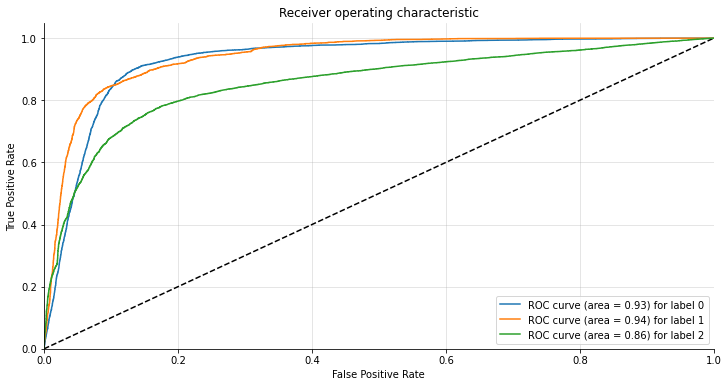

In [ ]:
plot_multiclass_roc(vote_clf, X_test, y_test, n_classes=3, figsize=(12, 6))

### Voting w/ SMOTE

In [ ]:
vote_clf_smote = VotingClassifier(estimators=[('knn', knn_clf), ('rf', rnd_clf),('xgb',xgb_clf)], voting='soft')
vote_clf_smote.fit(X_res, y_res)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(objective='multi:softprob',
                                            random_state=42))],
                 voting='soft')

In [ ]:
# Compare basic voting vs voting w/ smote
print("==== Basic Voting on Test data =====")
evaluate_test(vote_clf, X_test, y_test)
print()
print()
print("=== Voting with SMOTE on Test data ===")
evaluate_test(vote_clf_smote, X_test, y_test)

==== Basic Voting on Test data =====
Area Under Curve (AUC): 0.91

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7935     0.7524      0.8048    0.7926      0.7836   
recall        0.7974     0.7247      0.8124    0.7926      0.7782   
f1-score      0.7954     0.7383      0.8086    0.7926      0.7808   
support    5874.0000  3527.0000  10599.0000    0.7926  20000.0000   

           weighted avg  
precision        0.7922  
recall           0.7926  
f1-score         0.7923  
support      20000.0000  


=== Voting with SMOTE on Test data ===
Area Under Curve (AUC): 0.91

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7684     0.6749      0.8567    0.7886      0.7667   
recall        0.8536     0.8276      0.7396    0.7886      0.8069   
f1-score      0.8088     0.7435      0.7939    0.7886      0.7820   
support    5874.0000  3527.0000  10599.0000    0.7886  20000.000

### Voting w/ RFECV + SMOTE

In [ ]:
vote_clf_smote_rfecv = VotingClassifier(estimators=[('knn', knn_clf), ('rf', rnd_clf),('xgb',xgb_clf)], voting='soft')
vote_clf_smote_rfecv.fit(X_res_rfe, y_res)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(objective='multi:softprob',
                                            random_state=42))],
                 voting='soft')

In [ ]:
# compare basic random forest vs random forest w/ smote + RFECV
print("==== Basic Voting Classifier on Test data =====")
evaluate_test(vote_clf, X_test, y_test)
print()
print()
print("=== Voting Classifer with SMOTE + RFECV on Test data ===")
evaluate_test(vote_clf_smote_rfecv, X_RFE_test, y_test)

==== Basic Voting Classifier on Test data =====
Area Under Curve (AUC): 0.91

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7935     0.7524      0.8048    0.7926      0.7836   
recall        0.7974     0.7247      0.8124    0.7926      0.7782   
f1-score      0.7954     0.7383      0.8086    0.7926      0.7808   
support    5874.0000  3527.0000  10599.0000    0.7926  20000.0000   

           weighted avg  
precision        0.7922  
recall           0.7926  
f1-score         0.7923  
support      20000.0000  


=== Voting Classifer with SMOTE + RFECV on Test data ===
Area Under Curve (AUC): 0.92

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7801     0.7294      0.8615    0.8081      0.7903   
recall        0.8801     0.8293      0.7610    0.8081      0.8235   
f1-score      0.8271     0.7762      0.8081    0.8081      0.8038   
support    5874.0000  3527.0000  10

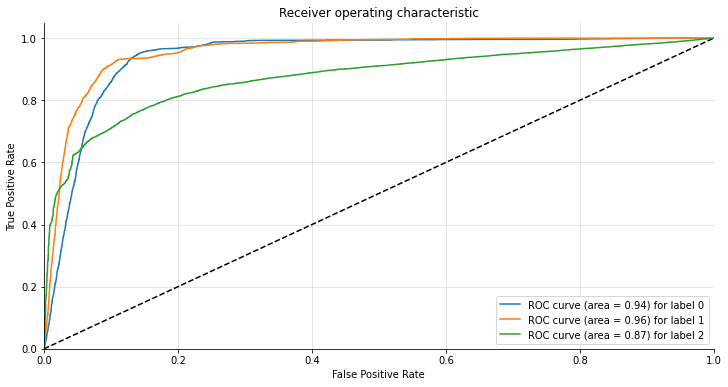

In [ ]:
plot_multiclass_roc(vote_clf_smote_rfecv, X_RFE_test, y_test, n_classes=3, figsize=(12, 6))

## Best performing model w/ hyper-parameter tuning (Random Forest) 

In [ ]:
# Random Forest is a beast :)
from sklearn.model_selection import train_test_split, GridSearchCV

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [ ]:
rf = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_res_rfe, y_res)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}  



In [ ]:
# Performed on 11/23/22 @ 9:47 pm
# Accuracy: 0.8094 / 0.811
# F1 macro: 0.8014 / 0.8030
# AUC: 0.93
# Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}

# n_est: 99  / 0.8125 acc / 0.8048 f1


In [ ]:
randmf = RandomForestClassifier(n_estimators = 99, min_samples_split = 10, min_samples_leaf= 4, max_features = 'auto', max_depth= 50, bootstrap=True, random_state=42) 
randmf.fit( X_train, y_train) 

RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=99, random_state=42)

In [ ]:
# Compare basic random forest vs param tuned random forest  :)
print("==== Basic RF on Test data =====")
evaluate_test(rnd_clf, X_test, y_test)
print()
print()
print("=== RF with Tuning on Test data ===")
evaluate_test(randmf, X_test, y_test)

==== Basic RF on Test data =====
Area Under Curve (AUC): 0.92

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7854     0.7491      0.8127    0.7931      0.7824   
recall        0.8199     0.7491      0.7929    0.7931      0.7873   
f1-score      0.8023     0.7491      0.8027    0.7931      0.7847   
support    5874.0000  3527.0000  10599.0000    0.7931  20000.0000   

           weighted avg  
precision        0.7935  
recall           0.7931  
f1-score         0.7931  
support      20000.0000  


=== RF with Tuning on Test data ===
Area Under Curve (AUC): 0.93

CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision     0.7995     0.7751      0.8270    0.8096      0.8006   
recall        0.8372     0.7601      0.8107    0.8096      0.8027   
f1-score      0.8180     0.7675      0.8188    0.8096      0.8014   
support    5874.0000  3527.0000  10599.0000    0.8096  20000.0000   

 

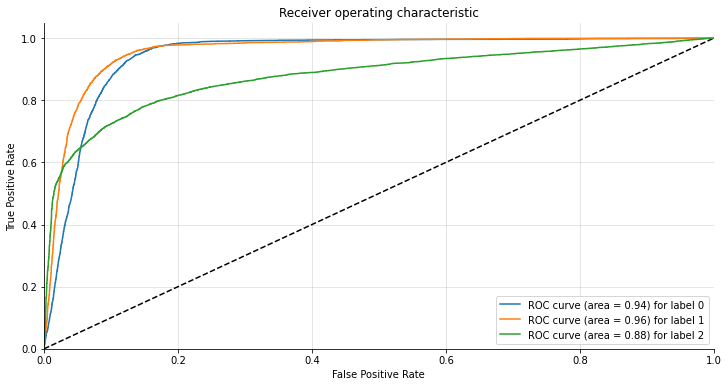

In [ ]:
plot_multiclass_roc(randmf, X_test, y_test, n_classes=3, figsize=(12, 6))